# <span style="color:green"> Laboratorio di Simulazione Numerica </span>
## <span style="color:blue">  Esercizio 2 </span>


### Esercizio 2.1
Si è calcolato con tecnica Montecarlo l'integrale $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$ 
Dapprima si è stimato il valore dell'integrale con il metodo della media:
si estrae nell'intervallo di integrazione da una distribuzione uniforme, si valuta la funzione nel punto estratto, si ripete l'operazione un dato numero di volte (qui si è scelto di fare 100 passi),abbiamo così eseguito un passo Montecarlo.
Sono stati eseguiti M=10^6 passi Montecarlo, su cui abbiamo  fatto l'analisi statistica utilizzando il metodo della media a blocchi con N=100 come numero di blocchi

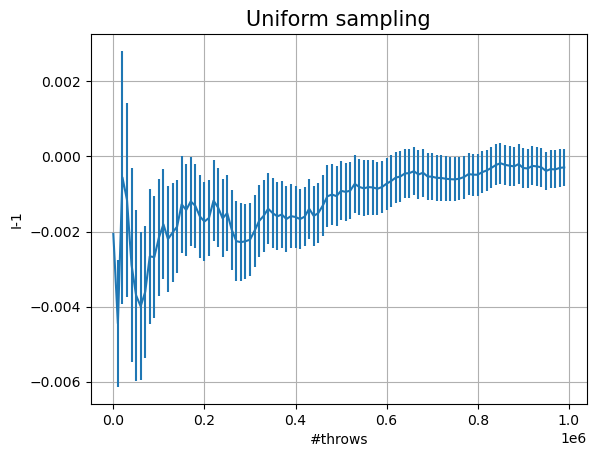

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(100)

# Carica i dati dal file
data = np.loadtxt('2.1/unif.dat')

x*=10000

plt.errorbar(x,data[:,0]-1,yerr=data[:,1])
plt.xlabel('#throws')
plt.ylabel('I-1')
plt.title ('Uniform sampling', fontsize= 15)
plt.grid(True)
plt.show()

 Risultati: I= 0.99971  dev st=0.000499 in accordo con il risultato aspettato

Abbiamo poi ripetuto il procedimento ma questa volta estraendo il punto dove valutare l'integrale da una distribuzione del tipo $$ d(x)= 2(1-x)$$ che corrisponde allo sviluppo di Taylor dell'integranda, questo metodo, chiamato importance sampling, permette di aumentare la precisione della nostra stima, riscrivendo infatti l'integrale come $$I = \int_0^1 \frac{g(x)p(x)}{d(x)}d(x) dx $$ dove g(x) è la funzione di cui vogliamo stimare l'integrale, p(x) è la distribuzione uniforme e d(x) è scelta in modo da minimizzare la varianza. Il suo minimo è zero e si trova per d(x)= g(x), ma questo corrisponde al caso in cui il risultato dell'integrale è noto, deduciamo quindi che una buona scelta di d(x) è una funzione che approssimi bene l'integranda, da qui la scelta sopracitata dello sviluppo di Taylor

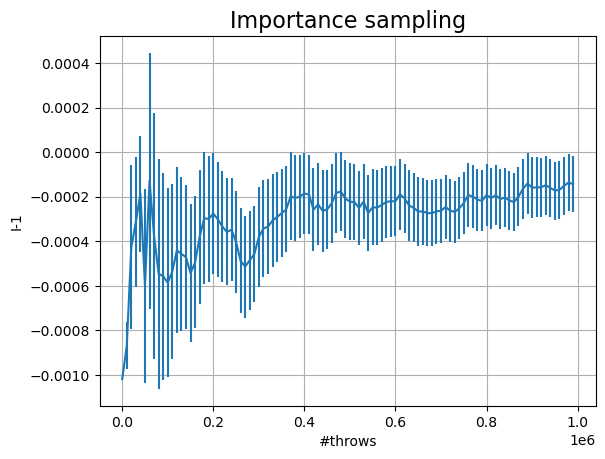

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(100)

# Carica i dati dal file
data = np.loadtxt('2.1/importance.dat')

x*=10000

plt.errorbar(x,data[:,0]-1,yerr=data[:,1])
plt.xlabel('#throws')
plt.ylabel('I-1')
plt.title('Importance sampling', fontsize= 15)
plt.grid(True)
plt.show()

Risultati: I= 0.999857  dev st= 0.000127 dove possiamo osservare che l'incertezza (a parità di passi Montecarlo) si è ridotta di un quinto come atteso

### Esercizio 2.2
Di seguito viene simulato un cammino in uno spazio 3D in cui la direzione di ognuno dei 100 passi, la cui dimensione è fissata, è estratta casualmente
1. fra uno degli assi cartesiani lungo i quali è possibile muoversi sia in avanti sia indietro
2. in una qualsiasi direzione dello spazione determinata da due angoli


I 100 passi del cammino costituiscono un passo Montecarlo che viene ripetuto 10^5 volte, viene infine eseguita la media dividendo la totalità dei lanci in 100 blocchi.
Viene di seguito riportata la media in funzione del numero dei passi nei due casi

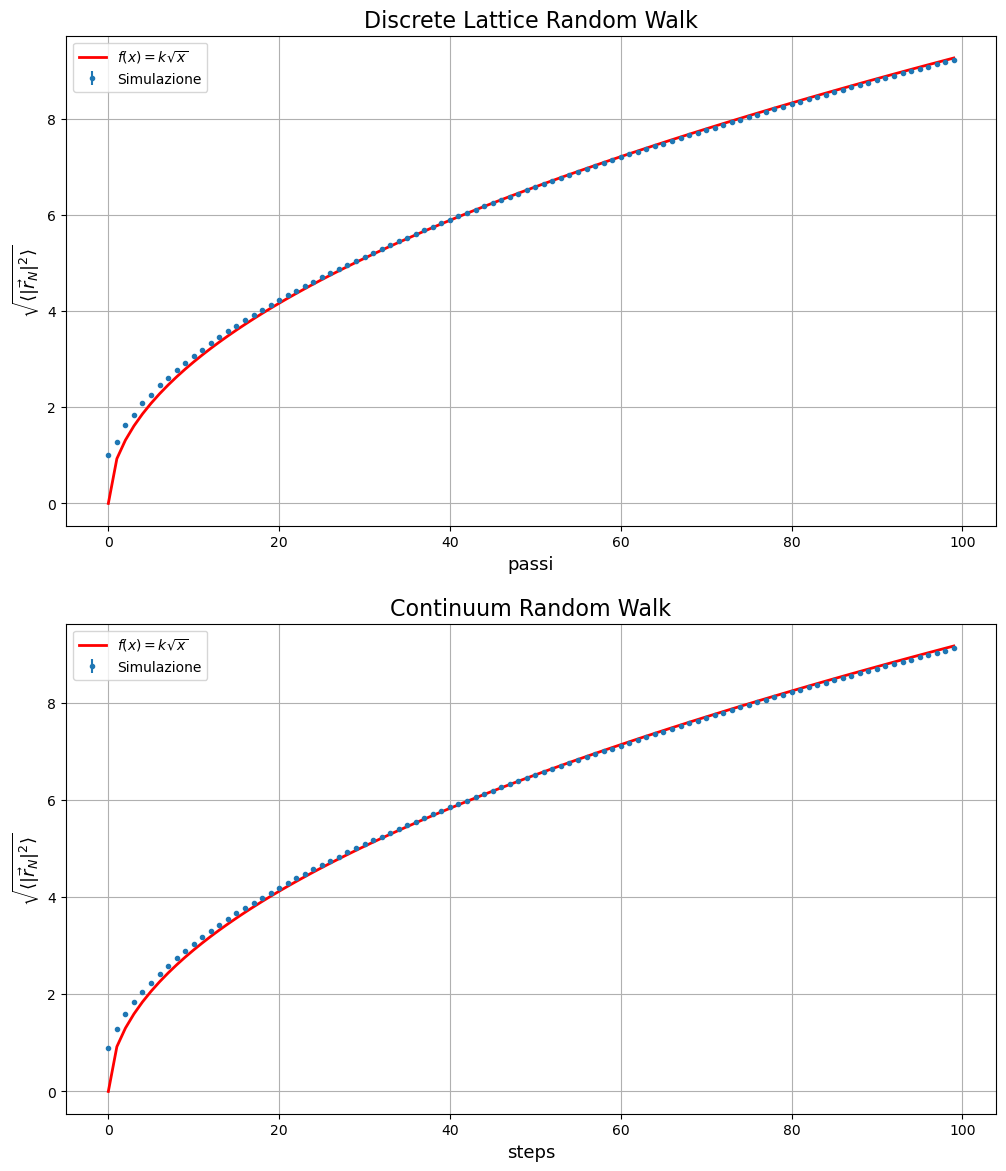

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f (x,k):
    return k*(x**0.5)

#loading and fitting data
yD, errD = np.loadtxt("2.2/randomwalkdiscreto.dat", usecols=(0,1), delimiter=' ', unpack=True)
x      = np.arange(yD.size)
yC, errC = np.loadtxt("2.2/randomwalkcontinuo.dat", usecols=(0,1), delimiter=' ', unpack=True)
x      = np.arange(yC.size)

#discrete fit
p_opt_disc, p_cov_disc = curve_fit(f, x, yD)
y_fit = f(x,p_opt_disc[0])


#continuos fit
p_opt_cont, p_cov_cont = curve_fit(f, x, yC)
y_fit = f(x,p_opt_cont[0])
print ()
#graphing
plt.figure(figsize=(12,14))

plt.subplot(211)
plt.errorbar(x,yD,errD,fmt='.',label='Simulazione')
plt.grid(True)
plt.xlabel('passi',fontsize=13)
plt.ylabel(r'$\sqrt{\langle|\vec{r}_{N}|^2\rangle}$',fontsize=13)
plt.title("Discrete Lattice Random Walk",fontsize=16)
y_fitD = f(x,p_opt_disc)
plt.plot(x,y_fitD,'r',linewidth=2,label='$f(x)=k\sqrt{x}$') # plotting fitted function
plt.legend()

plt.subplot(212)
plt.errorbar(x,yC,errC,fmt='.',label='Simulazione')
plt.grid(True)
plt.xlabel('steps',fontsize=13)
plt.ylabel(r'$\sqrt{\langle|\vec{r}_{N}|^2\rangle}$',fontsize=13)
plt.title("Continuum Random Walk",fontsize=16)
y_fitC = f(x,p_opt_cont)
plt.plot(x,y_fitC,'r',linewidth=2,label='$f(x)=k\sqrt{x}$') # plotting fitted function
plt.legend()

plt.show()